In [1]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

In [2]:
TZdepth = -660.

def calculateIntegral(arr,dx):
    aux = np.zeros(arr.size)
    aux[1:-1] = arr[1:-1] * dx
    aux[0] = arr[0] * dx / 2.
    aux[-1] = arr[-1] * dx / 2.0
    integral = aux.sum()
    return integral

def velocityIn(depthTop,depthBot,depth,slabVelocitySI):
    velo = np.zeros(depth.size)
    depthTopAux = depthTop
    depthBotAux = TZdepth - depthBot
    cond = depth[(depth<=depthTopAux)&(depth>=depthBotAux)]
    whre = np.where((depth<=depthTopAux)&(depth>=depthBotAux))
    z = np.linspace(-2,2,cond.size)
    p = (slabVelocitySI/2.) + (slabVelocitySI/2.0) * erf(z)
    velo[whre] = p
    velo[depth>=depthTopAux] = slabVelocitySI
    velo[depth<=depthBotAux] = 0.0
    return velo

def velocityOut(depthT,depthB,depth,slabVelocitySI,integralIn):

    depthTop = depthT
    depthBot = TZdepth
    
    depthOutChange = -100
    velo = np.ones(depth.size) * slabVelocitySI
    
    depth0 = depthBot - depthOutChange - depthB
    cond0 = depth[(depth<=depthTop)&(depth>=depth0)]
    whre0 = np.where((depth<=depthTop)&(depth>=depth0))
    
    depth1 = depthBot - depthOutChange
    cond1 = depth[(depth<=depth1)&(depth>=depthBot)]
    whre1 = np.where((depth<=depth1)&(depth>=depthBot))
    
    z0 = np.linspace(-2,2,cond0.size)
    z1 = np.linspace(-2,2,cond1.size)
    p0 = (slabVelocitySI/2.) - (slabVelocitySI/2.0) * erf(z0)
    p1 = (slabVelocitySI/2.) + (slabVelocitySI/2.0) * erf(z1)
    velo[whre0] = p0
    velo[whre1] = p1
    velo[depth>=depthTop] = 0.0
    velo[depth<=depthBot] = 0.0

    # Fix mass conservation equation
    integralOut = calculateIntegral(velo,depth[1]-depth[0])
    count = -1
    while (integralIn!=integralOut):
        integralDiff = integralIn - integralOut
        print "IN",integralDiff
        try:
            idx = whre1[0][count]
        except IndexError:
            print("COULD NOT GUARANTEE MASS CONSERVATION, DIFFERENCE OF"),
            integralOut = calculateIntegral(velo,depth[1]-depth[0])
            print(integralOut-integralIn)
            break
        dz = depth[idx] - depth[idx-1]
        if (integralDiff>0.) and (velo[idx]<slabVelocitySI):
            dArea = velo[idx] * dz
            aVelo = (dArea+integralDiff) / dz
            print slabVelocitySI,aVelo,velo[idx],
            if (aVelo>slabVelocitySI):
                velo[idx] = slabVelocitySI
            else:
                velo[idx] = aVelo
        else:
            pass
        print(velo[idx])
        integralOut = calculateIntegral(velo,depth[1]-depth[0])
        count -= 1
    return velo

IN 3.705711921259216e-11
1.5844043907e-09 1.584404390701452e-09 1.5806986787801928e-09 1.5844043907014474e-09
IN 5.293955920339377e-23
1.5844043907e-09 1.5656675280634862e-09 1.5656675280634808e-09 1.5656675280634862e-09


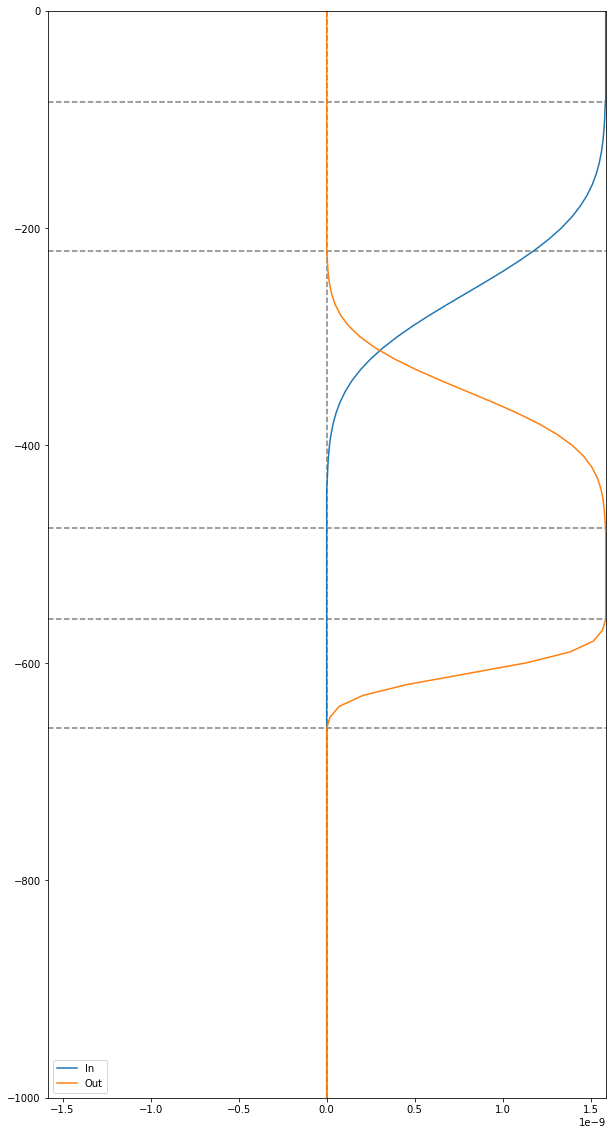

In [3]:
depth = np.linspace(-1000,0,101)
velo = np.zeros(shape=(1,1,depth.size))

wdepth = -41.894805873695205 * 2 
edepth = -221.2135547453094 

velo0 = 50.0
veloSI = velo0 / ((365.25*24*60*60)/(1.0E-3))

# IN
veloIn = velocityIn(wdepth,edepth,depth,veloSI)
integralIn = calculateIntegral(veloIn,depth[1]-depth[0])

# OUT
veloOut = velocityOut(edepth,wdepth,depth,veloSI,integralIn)

plt.figure(figsize=(10,20))
plt.xlim(-veloSI,veloSI)
plt.ylim(depth[0],depth[-1])
plt.hlines(wdepth,-veloSI,veloSI,linestyles="dashed",color=(0.5,0.5,0.5))
plt.hlines(TZdepth-wdepth+100,-veloSI,veloSI,linestyles="dashed",color=(0.5,0.5,0.5))
plt.hlines(edepth,-veloSI,veloSI,linestyles="dashed",color=(0.5,0.5,0.5))
plt.hlines(TZdepth+100,-veloSI,veloSI,linestyles="dashed",color=(0.5,0.5,0.5))
plt.hlines(TZdepth,-veloSI,veloSI,linestyles="dashed",color=(0.5,0.5,0.5))
plt.vlines(0,depth[0],depth[-1],linestyles="dashed",color=(0.5,0.5,0.5))
plt.plot(veloIn,depth,label="In")
plt.plot(veloOut,depth,label="Out")
plt.legend(loc=3)

In [4]:
integralIn = calculateIntegral(veloIn,depth[1]-depth[0])
integralOut = calculateIntegral(veloOut,depth[1]-depth[0])
print(integralIn,integralOut,integralIn-integralOut)

(4.1194514158237643e-07, 4.1194514158237643e-07, 0.0)
